# 09 - Random Variables


## Introduction to Random Variables
A **random variable** is a numerical outcome of a random event. It can be either **discrete** or **continuous**.

### Types of Random Variables
1. **Discrete Random Variable**: Takes a countable, finite number of distinct values.

    - **Example**: The number of heads when flipping a coin $10$ times can be $0, 1, 2, ..., 10$.

2. **Continuous Random Variable**: Can take any value in a continuous range.

    - **Example**: The height of a person is a continuous variable since it can be any value within a reasonable range.

Each random variable has an associated **distribution function**, which describes the probability that the random variable will take a specific value (discrete) or fall within an interval (continuous).

<p align="center">
  <img src="imgs/random_variables1.jpg" alt="Alt text" width="900" height="500">
</p>

## Probability Mass Function (PMF) (for Discrete Random Variables)
- **Definition**: The PMF provides the probability that a discrete random variable takes a particular value.

- **Formula**:

$$P(X = x) = \text{Probability that } X \text{ takes the value } x$$

### Example: Rolling a Die
Consider a fair six-sided die. A die has six faces numbered from 1 to 6, and when rolled, each face is equally likely to land facing up.

The random variable $X$ represents the value that appears when rolling the die. 

Since each face is equally likely, we can represent the probability of rolling any specific number as follows:

$$P(X = 1) = P(X = 2) = P(X = 3) = P(X = 4) = P(X = 5) = P(X = 6) = \frac{1}{6} \approx 0.1667 \approx16.67\%$$

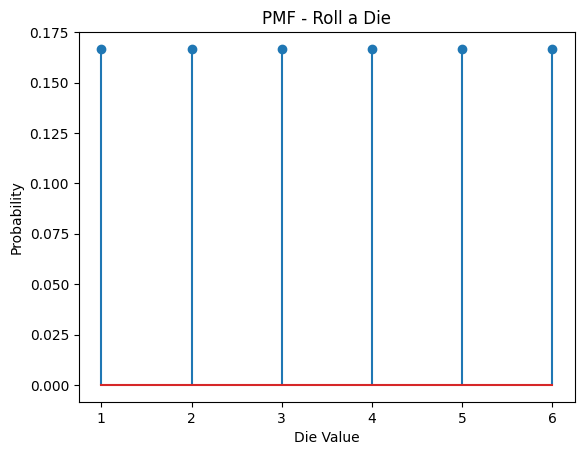

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Discrete values (1 to 6 for a die)
values = np.arange(1, 7)

# All outcomes have an equal probability (1/6 for a fair die)
pmf = [1/6] * 6

# Plotting the PMF
plt.stem(values, pmf)
plt.title("PMF - Roll a Die")
plt.xlabel("Die Value")
plt.ylabel("Probability")
plt.show()

- **Explanation**: In this case, the PMF is uniform, meaning each outcome (1 to 6) has the same probability, $\frac{1}{6} \approx 0.1667 \approx16.67\%$.

## Probability Density Function (PDF) (for Continuous Random Variables)
- **Definition**: The PDF provides the density of a continuous random variable over a range of values. The probability that the variable falls within a specific interval is the area under the curve of the PDF in that interval.

- **Formula**:

$$f(x) = \text{Probability density at } x$$

The total area under the PDF curve is always 1.

### Example: Finding the Probability of a Person’s Height Falling Between an Interval
Let’s assume that heights in a population are normally distributed with:

- Mean height $\mu = 170 \text{ cm}$

- Standard deviation $\sigma = 20 \text{ cm}$

We can use the normal distribution to model the height of individuals. The PDF of a normal distribution is:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

More on this later...

We want to calculate the probability that a randomly selected person's height falls between an interval (e.g. between 150cm and 200cm).

- This is equivalent to finding the area under the normal distribution curve between these two points.

FloatText(value=150.0, description='Lower:')

FloatText(value=200.0, description='Upper:')

Button(description='Show Interval', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

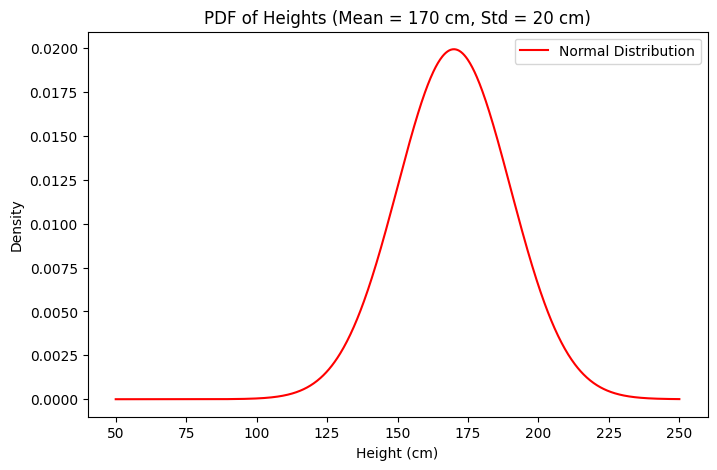

In [3]:
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, clear_output

# Parameters for normal distribution
mu = 170  # Mean height in cm
sigma = 20  # Standard deviation in cm

# Generate 1000 data points for heights from 50cm to 250cm
data = np.linspace(50, 250, 1000)

# Calculate the PDF for these heights
pdf = norm.pdf(data, mu, sigma)

# Create input widgets for lower and upper bounds
lower_bound = widgets.FloatText(
    value=150,
    description='Lower:',
    disabled=False
)

upper_bound = widgets.FloatText(
    value=200,
    description='Upper:',
    disabled=False
)

# Create buttons for "Show Interval" and "Clear"
show_button = widgets.Button(description="Show Interval")
clear_button = widgets.Button(description="Clear")

def plot_pdf(show_interval=False):
    # Clear previous output (including plots)
    clear_output(wait=True)
    
    # Display widgets and buttons
    display(lower_bound, upper_bound, show_button, clear_button)
    
    # Create a new plot
    plt.figure(figsize=(8, 5))
    plt.plot(data, pdf, 'r-', label='Normal Distribution')
    
    if show_interval:
        # Get values from the input widgets
        lb = lower_bound.value
        ub = upper_bound.value
        
        # Fill the area between the specified lower and upper bounds
        plt.fill_between(data, pdf, where=(data >= lb) & (data <= ub), color='blue', alpha=0.2, label=f"Area between {lb}cm and {ub}cm")
    
    plt.title('PDF of Heights (Mean = 170 cm, Std = 20 cm)')
    plt.xlabel('Height (cm)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # If showing the interval, calculate and display the probability
    if show_interval:
        prob = norm.cdf(ub, mu, sigma) - norm.cdf(lb, mu, sigma)
        print(f"The probability that someone's height falls between {lb} cm and {ub} cm is approximately {prob:.4f} or {prob * 100:.2f}%.")

# Define button actions
def on_show_clicked(b):
    plot_pdf(show_interval=True)

def on_clear_clicked(b):
    plot_pdf(show_interval=False)

# Link buttons to actions
show_button.on_click(on_show_clicked)
clear_button.on_click(on_clear_clicked)

# Initial plot (without interval filled)
plot_pdf()

- **Explanation**: The plot shows the bell-shaped curve of a normal distribution. The area under the curve represents the probability of the variable falling within a specific range.

    - The probability is calculated using the cumulative distribution function (CDF) of the normal distribution, which tells us the area under the curve between these two values.

## Cumulative Distribution Function (CDF)
- **Definition**: The CDF represents the probability that a random variable will take a value less than or equal to a given value.

- **Formula**:

$$F(x) = P(X \leq x)$$

### Example: CDF of a Normal Distribution

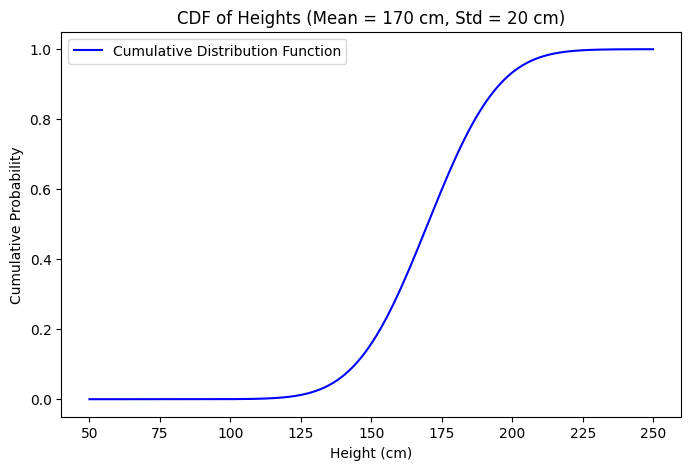

In [4]:
# Calculate the CDF for these heights
cdf = norm.cdf(data, mu, sigma)

# Plotting the CDF
plt.figure(figsize=(8, 5))
plt.plot(data, cdf, 'b-', label='Cumulative Distribution Function')
plt.title('CDF of Heights (Mean = 170 cm, Std = 20 cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

- **Explanation**: The CDF represents the cumulative probability up to a given value. It increases monotonically from 0 to 1 as the value increases.

    - **Example**: At $170\text{cm}$ (the mean), the CDF value will be around $0.5$, meaning there’s a $50\%$ chance that a randomly selected individual’s height will be less than or equal to $170\text{cm}$.

## Common Probability Distributions

### Binomial Distribution (Discrete)
- **Definition**: The binomial distribution represents the number of successes in $n$ independent trials, such as flipping a coin. Each trial has two outcomes: success (e.g., heads) or failure (e.g., tails).

- **Parameters**:

    - $n$: Number of trials (e.g., total coin flips)

    - $p$: Probability of success (e.g., probability of flipping heads, typically $0.5$ for a fair coin)

- **Formula**:

$$P(X = k) = \begin{pmatrix}
n \\
k
\end{pmatrix} p^k (1-p)^{n-k}$$

Where $\begin{pmatrix}
n \\
k
\end{pmatrix}$ is the binomial coefficient.

#### Example: Flipping a Coin 10 times
Imagine you flip a fair coin 10 times. What is the probability of getting exactly $k$ heads?

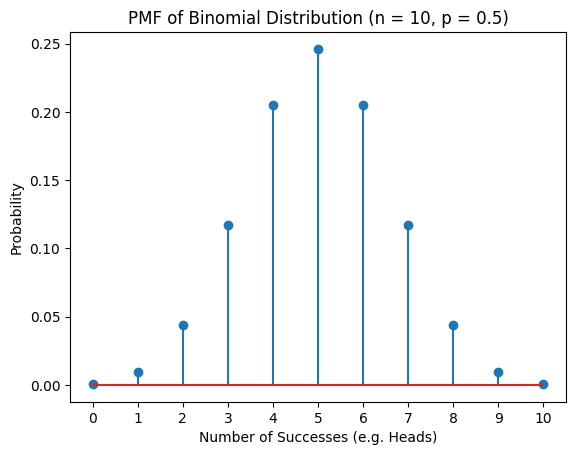

In [18]:
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate binomial distribution
x = np.arange(0, n+1)  # Possible number of heads (0 to 10)
pmf = binom.pmf(x, n, p)  # Probability Mass Function

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of Successes (e.g. Heads)")
plt.ylabel("Probability")
plt.xticks(x)  # Show all possible outcomes
plt.show()

- **Explanation**: The plot shows the probability of getting different numbers of successes (e.g. heads) when flipping a coin 10 times.

    - What would the probability look like if we flipped the coin 20 times instead?

    - How would the probability change if the coin were biased (e.g. $p = 0.7$)?

### Poisson Distribution (Discrete)
- **Definition**: The Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space.

- **Parameters**:

    - $\lambda$: Average number of events per interval (e.g. average calls per hour)

- **Formula**:

$$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

#### Example: Calls at a Call Center
Imagine a call center receives an average of $\lambda = 5$ calls per hour. We want to find out the probability of receiving a specific number of calls in one hour.

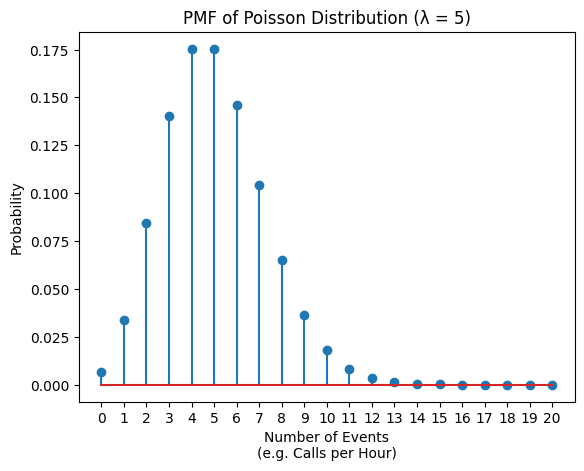

In [22]:
from scipy.stats import poisson

# Parameters
lambda_ = 5  # Average number of calls per hour
x = np.arange(0, 21)  # Possible number of calls (0 to 20)
pmf = poisson.pmf(x, lambda_)  # Probability Mass Function

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Poisson Distribution (λ = {lambda_})")
plt.xlabel("Number of Events\n(e.g. Calls per Hour)")
plt.ylabel("Probability")
plt.xticks(x)  # Show all possible outcomes
plt.show()

- **Explanation**: The plot visualizes the probabilities of receiving 0 to 20 calls in one hour. Each point indicates the likelihood of getting a specific number of calls.

    - What do you think would happen to the distribution if the average number of calls increased to $\lambda = 10$?

### Geometric Distribution (Discrete)
- **Definition**: The geometric distribution gives the probability that the first success will occur on the $k$-th trial in a sequence of independent trials, where each trial has the same probability of success.

- **Parameters**:

    - $p$: Probability of success (e.g., the chance of rolling a specific number on a die)

- **Formula**:

$$P(X = k) = (1 - p)^{k - 1}p$$

#### Example: Rolling a Die
Suppose we want to find the probability of rolling a 4 on a six-sided die for the first time on the $k$-th roll. Here, the probability of success if $p = \frac{1}{6} \approx 0.1667 \approx 16.67\%$.

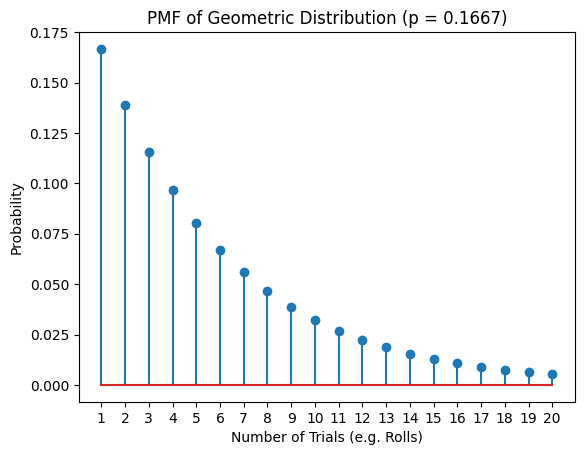

In [31]:
from scipy.stats import geom

# Parameters
p = 1/6  # Probability of rolling a 4
x = np.arange(1, 21)  # Possible number of trials (1 to 20)
pmf = geom.pmf(x, p)  # Probability Mass Function

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Geometric Distribution (p = {round(p, 4)})")
plt.xlabel("Number of Trials (e.g. Rolls)")
plt.ylabel("Probability")
plt.xticks(x)  # Show all possible outcomes
plt.show()

- **Explanation**: The plot visualizes the probabilities of needing 1 to 20 rolls to get the first 4. Each point represents the likelihood of achieving the first success on a specific roll, demonstrating how the geometric distribution models the scenario of waiting for the first success.

    - What if the die were biased, increasing the probability of rolling a 4 to $p=0.3$?

### Normal Distribution (Continuous)
- **Definition**: The normal distribution is a bell-shaped curve, where most values cluster around the mean.

- **Parameters**:

    - $\mu$: Mean (average value)

    - $\sigma$: Standard deviation (measure of spread)

- **Formula**:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

#### Example: Standard Normal Distribution
Consider a scenario where we have a standard normal distribution with a mean of $\mu = 0$ and a standard deviation of $\sigma = 1$. 
- This distribution is often used to represent standardized test scores or measurements that are normally distributed.

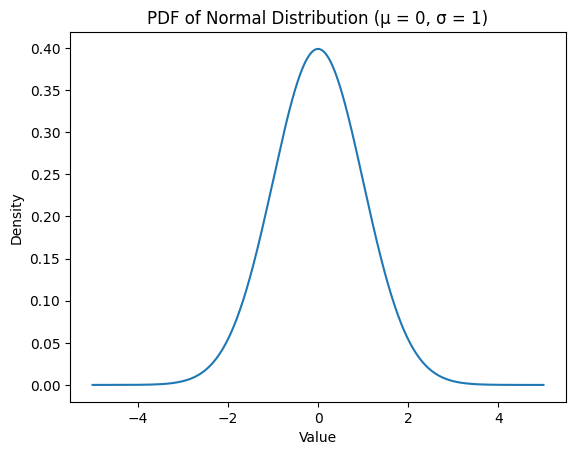

In [41]:
mu = 0 # Mean 
sigma = 1 # Standard deviation

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)

# Plotting
plt.plot(x, pdf)
plt.title(f"PDF of Normal Distribution (μ = {mu}, σ = {sigma})")
plt.xlabel("Value")
plt.ylabel("Density")
# plt.axvline(0, color='red', linestyle='--', label=f'Mean (μ = {mu})')  # Line at mean
# plt.axvline(-1, color='green', linestyle='--', label='-1σ')  # Line at -1σ
# plt.axvline(1, color='green', linestyle='--', label='+1σ')  # Line at +1σ
plt.show()

- **Explanation**: The plot displays the probability density function (PDF) of the standard normal distribution, illustrating how values are distributed around the mean. 

    - The vertical dashed lines represent the mean and one standard deviation away from the mean, emphasizing the key properties of the distribution.

    - How does the shape of the distribution change if we increase the standard deviation to $\mu = 2$?

    - How does the shape of the distribution change if we increase the mean to $\mu = 10$?

### Exponential Distribution (Continuous)
- **Definition**: The exponential distribution describes the time between events in a Poisson process, making it useful for modeling the time until the next occurrence of an event.

- **Parameters**:

    - $\lambda$: Rate of the event (the average number of events per unit time; the inverse of the mean time between events)

- **Formula**:

$$f(x) = \lambda e^{-\lambda x}$$

#### Example: Time Until the Next Bus Arrives
Imagine you are waiting for a bus that arrives on average every 10 minutes. This means the rate of arrival is $\lambda = \frac{1}{10} = 0.1$ per minute. The exponential distribution can be used to model the time until the next bus arrives.

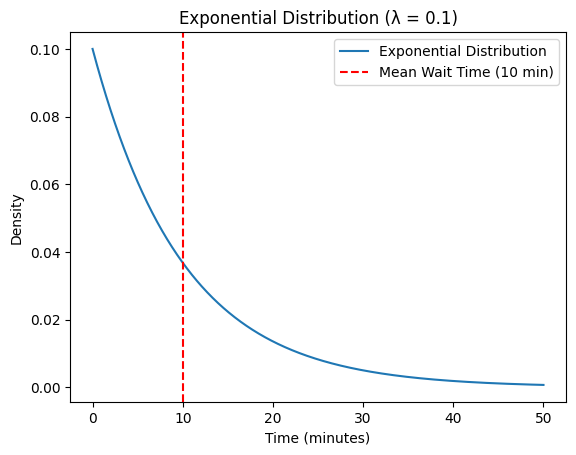

In [61]:
from scipy.stats import expon

# Parameters
mean_wait_time = 10
lambda_ = 1/mean_wait_time  # Rate of the event (1/mean wait time)
x = np.linspace(0, 50, 1000)  # Range of time (0 to 50 minutes)
pdf = expon.pdf(x, scale=1/lambda_)  # Probability Density Function

# Plotting
plt.plot(x, pdf, label='Exponential Distribution')
plt.title(f"Exponential Distribution (λ = {round(lambda_, 2)})")
plt.xlabel("Time (minutes)")
plt.ylabel("Density")
plt.axvline(mean_wait_time, color='red', linestyle='--', label=f'Mean Wait Time ({mean_wait_time} min)')  # Line at mean
plt.legend()
plt.show()

- **Explanation**: The plot illustrates the probability density function (PDF) of the exponential distribution, showing how likely it is for the bus to arrive after a certain amount of time. 

    - The vertical dashed line represents the average wait time of 10 minutes, indicating that while you might wait shorter times more frequently, longer waits are also possible but less likely.

    - If the bus arrives more frequently, say every 5 minutes, how would the distribution change?

### Uniform Distribution (Continuous)
- **Definition**: The uniform distribution assumes that all values within a specified interval have the same probability of occurrence, resulting in a constant probability density.

- **Parameters**:

    - $a$: Lower bound of the interval

    - $b$: Upper bound of the interval

- **Formula**:

$$f(x) = \frac{1}{b-a} \text{, for } a \leq x \leq b$$

#### Example: Rolling a Fair Die
Consider a scenario where you roll a fair six-sided die. Each face (1 through 6) has an equal chance of landing face up, making it a uniform distribution over the interval from 1 to 6.

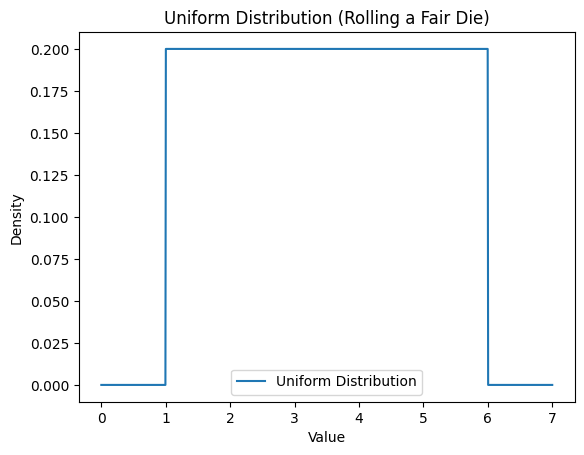

In [65]:
from scipy.stats import uniform

# Parameters
a = 1  # Lower bound
b = 6  # Upper bound
x = np.linspace(0, b+1, 1000)  # Range for plotting
pdf = uniform.pdf(x, loc=a, scale=b-a)  # Probability Density Function

# Plotting
plt.plot(x, pdf, label='Uniform Distribution')
plt.title("Uniform Distribution (Rolling a Fair Die)")
plt.xlabel("Value")
plt.ylabel("Density")
# plt.axvline(a, color='red', linestyle='--', label='Lower Bound (1)')  # Line at lower bound
# plt.axvline(b, color='green', linestyle='--', label='Upper Bound (6)')  # Line at upper bound
plt.legend()
plt.show()

- **Explanation**: The plot shows the probability density function (PDF) of the uniform distribution, indicating that every value between 1 and 6 has an equal likelihood of occurrence.

    - The dashed lines mark the lower and upper bounds, emphasizing the interval of interest.

    - How would the distribution change if we rolled a fair 12-sided die with value between 1 to 12?

## Additional Resources
- [Khan Academy - Random Variables](https://www.khanacademy.org/math/statistics-probability/random-variables-stats)

- [Khan Academy - Probability Distributions](https://www.khanacademy.org/math/statistics-probability/probability-distributions)

- [Coursera - Introduction to Probability and Data](https://www.coursera.org/learn/probability-statistics)

- [Probability and Statistics - Math is Fun](https://www.mathsisfun.com/data/)